Candidate: Andrés Felipe Bolaños Acosta <br>

Position: Business Intelligence Developer<br>

E-mail: afb.acosta@gmail.com<br>

Mobile phone: +5511973662765<br>

In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from dython.nominal import associations
import warnings

warnings.filterwarnings('ignore')

# Case :
## Building your own visualization:

Create at least one chart using the table IMDB_movies. The code must be in R or Python, and you are free to use any libraries, data in the table and graphic format. Explain why you chose the visualization (or visualizations) you are submitting.

<b> ANSWER: </b>

Since there is not an specific aim. The objective of the current analysis is to make insights in how a film should be produced to maximize its income:

Loading the database into a dataframe:

In [2]:
def connect():
    connection = (mysql.connector.connect(
                                user = 'looqbox-challenge', 
                                password = 'looq-challenge',
                                host = '35.199.127.241',
                                database = 'looqbox_challenge'))
    return connection   

In [3]:
conection_database = connect()

In [4]:
query = ("SELECT Id, Title, Genre, Director, "
                   "Actors , Year , Runtime, Rating, " 
                   "Votes , RevenueMillions, Metascore "
         "FROM IMDB_movies")
df_IMDB_movies = pd.read_sql(query, con = conection_database)
df_IMDB_movies.head(3)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.0,757074,333.0,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.0,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.0,157606,138.0,62.0


Looking for missing data:

In [5]:
df_IMDB_movies.isna().sum()

Id                   0
Title                0
Genre                0
Director             0
Actors               0
Year                 0
Runtime              0
Rating               0
Votes                0
RevenueMillions    128
Metascore           64
dtype: int64

Replacing the "ReveneuMillions" missing data with the mean value:

In [6]:
mean_reveneu = (df_IMDB_movies.RevenueMillions.
                loc[(df_IMDB_movies.RevenueMillions)
                     != "NaN"].mean())

In [7]:
df_IMDB_movies.RevenueMillions.fillna(
                        mean_reveneu, inplace = True)

Now, it should be stressed that a "METASCORE" is a grade determined by film's respected critics. consequently, it also can be filled with the mean value:

In [8]:
mean_metascore = (df_IMDB_movies.Metascore.
                  loc[(df_IMDB_movies.Metascore)
                     != "NaN"].mean())

In [9]:
df_IMDB_movies.Metascore.fillna(mean_metascore, 
                                inplace = True)

Checking again the missing values:

In [10]:
df_IMDB_movies.isna().sum()

Id                 0
Title              0
Genre              0
Director           0
Actors             0
Year               0
Runtime            0
Rating             0
Votes              0
RevenueMillions    0
Metascore          0
dtype: int64

Now, according to the objective it is necessary to order the data in regard to the generated profit:

In [11]:
df_IMDB_movies.sort_values(by = ["RevenueMillions"],
                           ascending = False, 
                           inplace = True)
df_IMDB_movies.head(5)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.0,661608,937.0,81.0
87,88,Avatar,"Action,Adventure,Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,8.0,935408,761.0,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.0,59.0
76,77,The Avengers,"Action,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.0,1045588,623.0,69.0
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.0,82.0


In [12]:
df_films_25_per = df_IMDB_movies.head(250)
df_films_75_per = df_IMDB_movies.tail(750)

In [13]:
total_revenue = df_IMDB_movies.RevenueMillions.sum()
revenue_25_percent = df_films_25_per.RevenueMillions.sum()
revenue_75_percent = df_films_75_per.RevenueMillions.sum()

In [14]:
lst_revenue = [revenue_25_percent / total_revenue,
               revenue_75_percent / total_revenue]
lst_labels = ["FIRST 25%", "REST 75%"]
df_revenue_proportion = pd.DataFrame(lst_revenue,
                                     index = lst_labels,
                                     columns = ["revenue_per"])

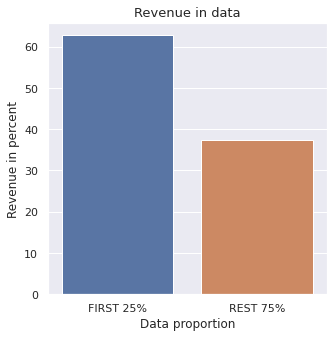

In [15]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = "darkgrid")
fig_obj = sns.barplot(x = df_revenue_proportion.index, 
                      y = df_revenue_proportion.revenue_per
                          * 100,
                      data = df_revenue_proportion)

fig_obj.set_title("Revenue in data",
                  fontsize = 13)    
fig_obj.set_xlabel("Data proportion")
fig_obj.set_ylabel("Revenue in percent")
plt.show()

As observed the top first 25 percent of the data generates more than 60 percent of the income, this is an important fact because in order to characterize a new movie to maximize profit, the top 25 percent must be studied since the other 75 percent of the data is not relevant according to the main purpose of this analysis. Consequently, the first top 25 percent of the data has the most valuable information in regard to the profit and constitutes henceforth the analysed data:

### Analysing per movie gender:

In [16]:
df_films = df_films_25_per.copy()
df_films.reset_index(inplace = True, drop = True)

In [17]:
def split_genre(str_movie_genre):
    split_genre = str_movie_genre.split(",")
    return split_genre

def genre_classifier(movie_genres, genre):
    if genre in movie_genres:
        return "YES"
    else:
        return "NO"

In [18]:
lst_total_genres = []

for i in range(len(df_films.Genre)):
    genres_movie = split_genre(df_films.Genre[i])
    for j in range(len(genres_movie)):
        lst_total_genres.append(genres_movie[j])
        
unique_genres = set(lst_total_genres)

In [19]:
df_films_genre = df_films.copy()

In [20]:
for genre in unique_genres:
    df_films_genre[genre] = (df_films_genre.Genre.apply(lambda x:
                                     genre_classifier(x, genre)))

In [21]:
df_films_genre.drop(["Id", "Title", "Genre",
                    "Director", "Actors", "Year",
                    "Runtime", "Rating", "Votes",
                    "Metascore"], axis=1, inplace = True)

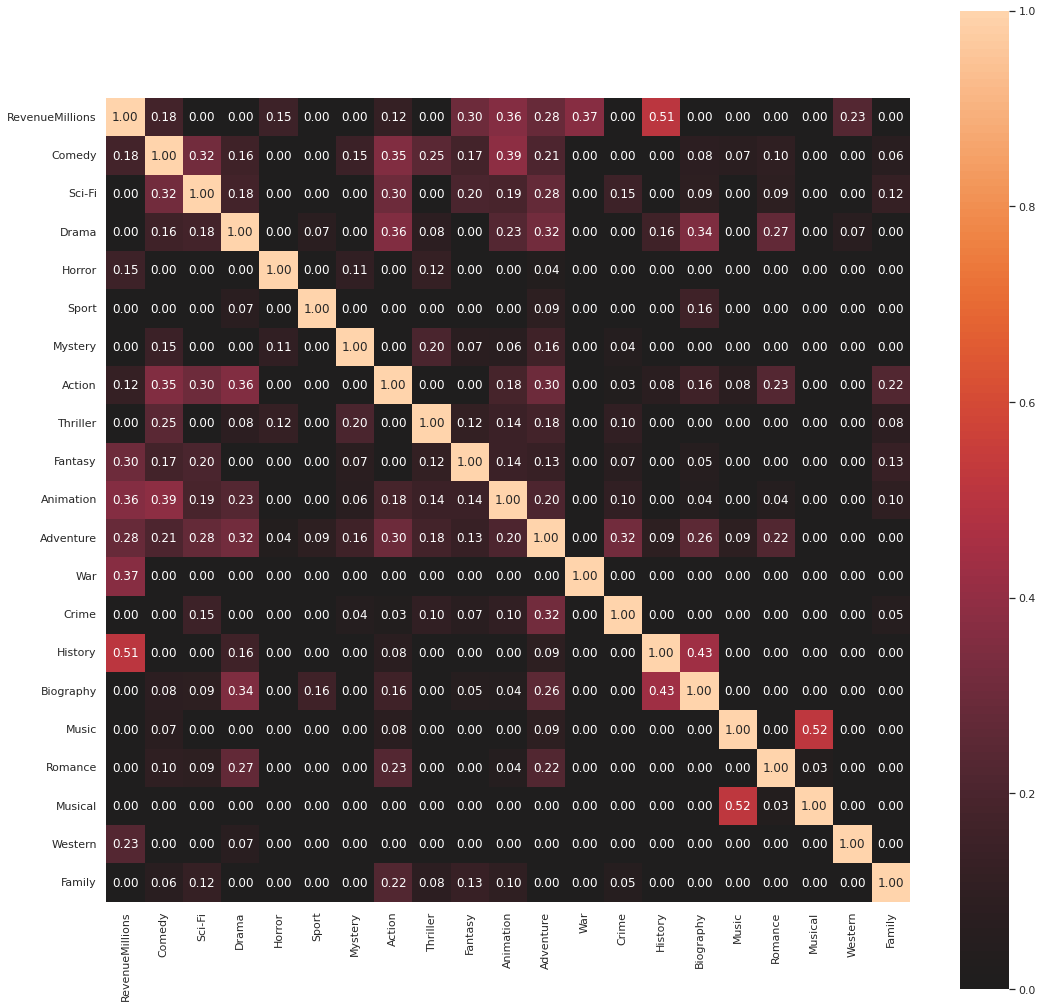

{'corr':                  RevenueMillions    Comedy    Sci-Fi     Drama    Horror  \
 RevenueMillions         1.000000  0.178142  0.000000  0.000000  0.149335   
 Comedy                  0.178142  1.000000  0.317459  0.158465  0.000000   
 Sci-Fi                  0.000000  0.317459  1.000000  0.175874  0.000000   
 Drama                   0.000000  0.158465  0.175874  1.000000  0.000000   
 Horror                  0.149335  0.000000  0.000000  0.000000  1.000000   
 Sport                   0.000000  0.000000  0.000000  0.074876  0.000000   
 Mystery                 0.000000  0.147283  0.000000  0.000000  0.109131   
 Action                  0.123574  0.354957  0.302281  0.357647  0.000000   
 Thriller                0.000000  0.249528  0.000000  0.081016  0.123367   
 Fantasy                 0.300758  0.172184  0.199233  0.000000  0.000000   
 Animation               0.360328  0.388181  0.187722  0.230673  0.000000   
 Adventure               0.284027  0.208471  0.280660  0.319373  0.0

In [22]:
numer_col = 0
categ_col = list(range(1, 21))

associations(df_films_genre, nominal_columns = numer_col, 
             numerical_columns = categ_col,
             nom_nom_assoc = "cramer", num_num_assoc = "pearson",
             nom_num_assoc = "correlation_ratio",
             figsize = (18, 18))

The previous chart's relation between the movie genres and the revenue, allow us to observe the correspondence between the genres and the revenue. "History", "War", "Adventure", "Animation", "Western", "Fantasy", "Comedy", "Horror" having a moderate correlation with the generated profits. This was carried out aiming to find a genre or genres strongly related with revenue.

In [23]:
df_films_genre.reset_index(inplace = True, drop = True)

In [24]:
correlated_genres = ["History", "War", "Adventure", 
                     "Animation", "Western", "Fantasy",
                     "Comedy", "Horror"]
lst_revenue = []

for genre in unique_genres:
    cor_movie_genre = (df_films_genre[
                       df_films_genre[genre] == "YES"])
    revenue_movie = cor_movie_genre.RevenueMillions.mean()
    lst_revenue.append(revenue_movie)

df_revenue = pd.DataFrame(
                lst_revenue, index = unique_genres,
                columns = ["Reveneu"])


In [25]:
df_revenue.sort_values(by = ["Reveneu"],
                             ascending = False, 
                             inplace = True)

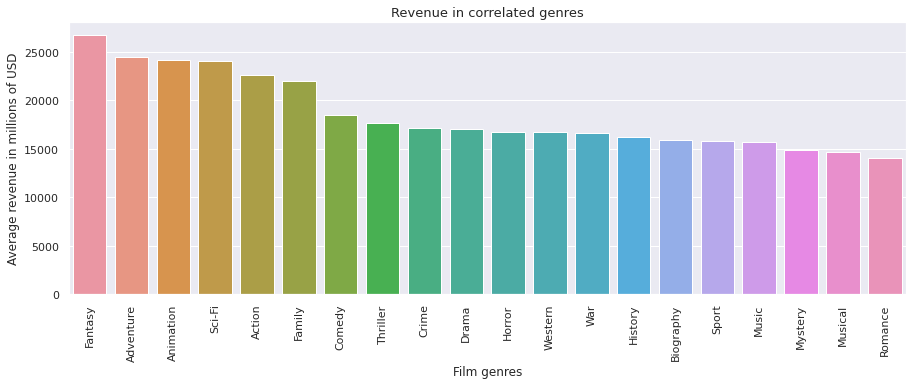

In [26]:
plt.figure(figsize = (15, 5))
sns.set_theme(style = "darkgrid")
fig_obj = sns.barplot(x = df_revenue.index, 
                      y = df_revenue.Reveneu
                          * 100,
                      data = df_revenue)
fig_obj.set_title("Revenue in correlated genres",
                  fontsize = 13)    
fig_obj.set_xlabel("Film genres")
fig_obj.set_ylabel("Average revenue "
                   "in millions of USD")
fig_obj.set_xticklabels(fig_obj.get_xticklabels(),
                        rotation = 90)
plt.show()

As observed, the relation between genre and revenue is not clear for this case "History" had a correlation of 0.51 but in the previous chart, its generated income is low.

Further, it is also required to study the behavior of the other categorical data in concerning "Director" and "Actors".

In [27]:
unique_directors = (df_films.Director.unique())

In [28]:
len(unique_directors)

162

With respect to the directors, there are 162 directors in the top 25 percent (related to the highes revenue) of the data. An attempt to analyze directors and revenue was developed, but there was not computational capacity and the dython library did not converge.

Studying the actors within the top 25 percent:

In [29]:
def split_actors(str_movie_actor):
    split_actor = str_movie_actor.split(",")
    return split_actor

lst_total_actors = []
for i in range(len(df_films.Actors)):
    actors_movie = split_actors(df_films.Actors[i])
    for j in range(len(actors_movie)):
        lst_total_actors.append(actors_movie[j])
        
unique_actors = set(lst_total_actors)

In [30]:
len(unique_actors)

679

There are 679 actors, there is no computational capacity to analyse their relation with the revenue from the Dython library.

### Analysing numeric features:

In [31]:
df_films = df_films_25_per.copy()
df_films.reset_index(inplace = True, drop = True)

Developing a Pearson correlation chart:

In [32]:
df_films_continous = df_films.copy()
df_films_continous.drop(["Id", "Title", "Genre",
                         "Director", "Actors"], 
                         axis=1, inplace = True)

<AxesSubplot:>

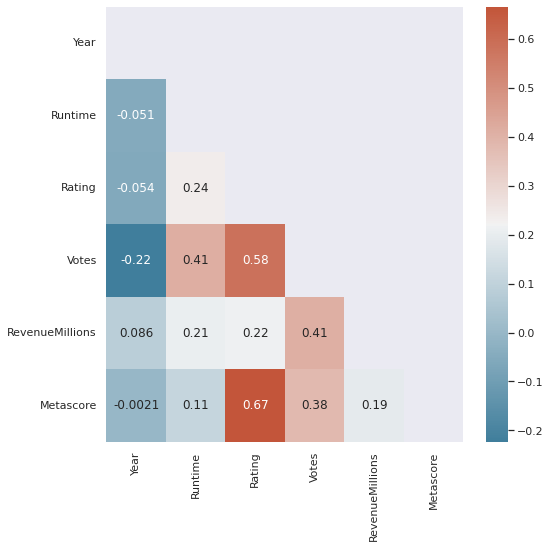

In [33]:
f, ax = plt.subplots(figsize=(8, 8))
mask = np.triu(np.ones_like(df_films_continous.corr(), 
                            dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df_films_continous.corr(), annot = True,
            mask = mask, cmap = cmap)

Now it is necessary to explore the behavior of the numer of votes and the revenue, because it has the strongenst relation with the income feature (with respect to the analysed variables). With this purpose in mind, the data will be classied in three levels according to the number of votes.

In [34]:
df_film_votes = df_films.copy()

Determining the number of bins:

In [35]:
bin_size = ((df_film_votes.Votes.max() 
            - df_film_votes.Votes.min())
            / 4) 

In [36]:
bin_1 = int(df_film_votes.Votes.min())
bin_2 = int(bin_1 + bin_size)
bin_3 = int(bin_2 + bin_size)
bin_4 = int(df_film_votes.Votes.max())

bins = [bin_1, bin_2, bin_3, bin_4]
labels = ["low", "medium", "high"]

Classifying the data into three voted levels (low, medium, high):

In [37]:
df_film_votes["Vote_level"] = (pd.cut(df_film_votes["Votes"], 
                               bins = bins, labels = labels))

In [38]:
group_vote = df_film_votes[["Vote_level", 
                            "RevenueMillions"]].copy() 
group_vote =  (group_vote.groupby("Vote_level",
               as_index = True).agg({"RevenueMillions": 
                                     "mean"}))

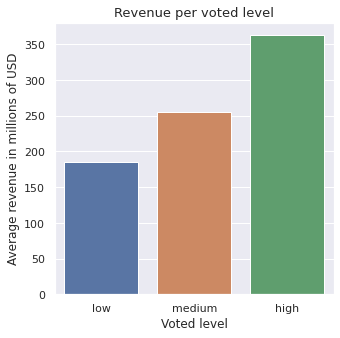

In [39]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = "darkgrid")
fig_obj = sns.barplot(x = group_vote.index, 
                      y = group_vote.RevenueMillions,                         
                      data = group_vote)

fig_obj.set_title("Revenue per voted level",
                              fontsize = 13)    
fig_obj.set_xlabel("Voted level")
fig_obj.set_ylabel("Average revenue "
                   "in millions of USD")

plt.show()

The previous plot confirms the correlation between the votes and the revenue. Consequently, the study of the high voted films will give insights of the characteristics of a product that maximizes profit.

### Analysing high voted films:

In [40]:
df_high_voted = (df_film_votes[(
                 df_film_votes.Vote_level == 'high')])

df_high_voted.reset_index(inplace = True, drop = True)

In [41]:
df_high_voted

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore,Vote_level
0,88,Avatar,"Action,Adventure,Fantasy",James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,8.0,935408,761.0,83.0,high
1,77,The Avengers,"Action,Sci-Fi",Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.0,1045588,623.0,69.0,high
2,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.0,82.0,high
3,125,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,9.0,1222645,448.0,78.0,high
4,81,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,9.0,1583625,293.0,74.0,high
5,37,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,9.0,1047747,188.0,74.0,high
6,145,Django Unchained,"Drama,Western",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.0,1039115,163.0,81.0,high
7,100,The Departed,"Crime,Drama,Thriller",Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,9.0,937414,132.0,85.0,high
8,78,Inglourious Basterds,"Adventure,Drama,War",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.0,959065,121.0,69.0,high


Moreover, With respect to the genre in this group. Genres such as "action", "Adventure" and "Fantansy" are located and those also have the highest profit in the studied databaseit. The films runtime ranges from 143 to 169 min.
Further, it is also observed that directors like James Cameron, Joss Whedon, Christopher Nolan, Quentin Tarantino and Martin Scorserse appear. Christopher Nolan being four times. It is desirable to analyse If they are have a relation with the highest income.

In [42]:
def director_classifier(row, director):
    if director in row:
        return "YES"
    else:
        return "NO"

In [43]:
df_directors = df_films.copy()

In [44]:
for director in unique_directors:
    df_directors[director] = (df_directors.Director.apply(lambda x:
                              director_classifier(x, director)))

In [45]:
df_directors.drop(["Id", "Title", "Genre",
                    "Director", "Actors", "Year",
                    "Runtime", "Rating", "Votes",
                    "Metascore"], axis=1, inplace = True)

In [46]:
lst_rev_director = []

for director in unique_directors:
    cor_movie_direc = (df_directors[
                       df_directors[director] == "YES"])
    revenue_movie = cor_movie_direc.RevenueMillions.mean()
    lst_rev_director.append(revenue_movie)

df_rev_director = pd.DataFrame(
                  lst_rev_director, 
                  index = unique_directors,
                  columns = ["Revenue"])

In [47]:
directors_high_revenue = df_rev_director.head(20)


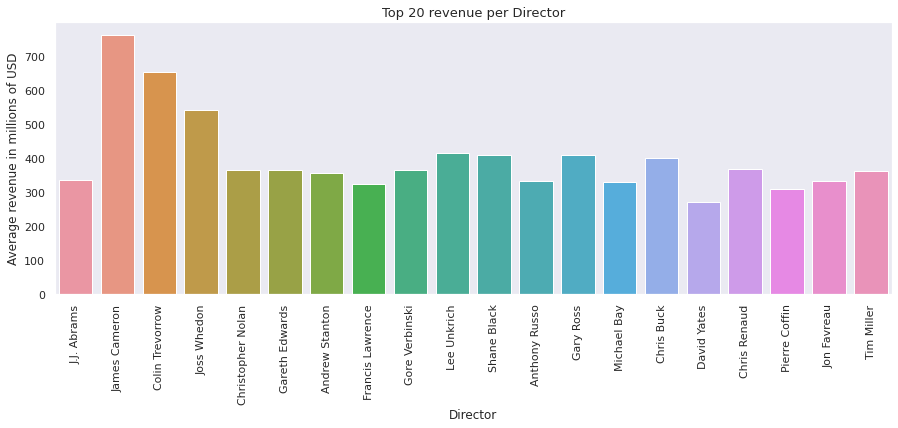

In [48]:
plt.figure(figsize = (15, 5))
sns.set_theme(style = "dark")
fig_obj = sns.barplot(x = directors_high_revenue.index, 
                      y = (directors_high_revenue.Revenue),                         
                      data = group_vote)

fig_obj.set_title("Top 20 revenue per Director",
                                  fontsize = 13)    
fig_obj.set_xlabel("Director")
fig_obj.set_ylabel("Average revenue "
                   "in millions of USD")
fig_obj.set_xticklabels(fig_obj.get_xticklabels(),
                        rotation = 90)

plt.show()

The previous chart displays the first 20 directors with the highest profit. It is observed that James Cameron, Joss Whedon and Cristopher Nolan appear. Consequently, these directors increase the revenue regading the relations actor-revenue and votes-revenue.

Approaching the characteristics of the most voted segmentation in regard to the actors:

In [49]:
lst_actors_voted = []

for i in range(len(df_high_voted.Actors)):
    actors_movie = split_actors(df_high_voted.Actors[i])
    for j in range(len(actors_movie)):
        lst_actors_voted.append(actors_movie[j])

In [50]:
fequency_voted_actors = {i:lst_actors_voted.count(i) 
                         for i in lst_actors_voted}

In [51]:
df_voted_actors = pd.DataFrame.from_dict(fequency_voted_actors, 
                                         orient = "index",
                                         columns = ["Frequency"])
df_voted_actors.sort_values(by = ["Frequency"],
                           ascending = False, 
                           inplace = True)

In [52]:
df_voted_actors.head()

,Frequency
Leonardo DiCaprio,2
Anne Hathaway,2
Christian Bale,2
Sam Worthington,1
Leonardo DiCaprio,1


Famous actors such as Leonardo DiCaprio, Anne Hathaway and Christian Bale are present in the highest voted film associated to the largest income. Consequently, the list of actors who could be hired to produce a movie with a large profit are listed in the "df_voted_actors" dataframe.

### Final remarks:

With the previous analysis, the insights that suggest a maximum film's revenue are:

- The  director should be James Cameron, Joss Whedon or Cristopher Nolan (James Cameron principally).
- The movie should be based on action, adventure, Scify and fantasy since these genres had the highest profit in the studied database.
- Even the run time has a low correlation (but not negligible) with revenue of 0.21 according to the Pearson chart, it is desirable it ranges within 143 to 169 min.
- In regard to the actors it was impossible to analyse a correlation with the revenue due to the lack of computational capacity. Several attempts to analyse director and actors likewise genre were carried out but the Dython library did not converge. However, famous actors like Anne Hathaway, Christian Bale and Leonardo DiCrapio appear within the segmentation with the highest profit and highly vote. However, the list of such a segmentation's actors are available.